### Insurance Claims

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import os
import matplotlib.pyplot as plt

In [2]:
df= pd.read_excel("Dataset_Public_mini.xlsx")

In [3]:
df.head()

,Claim Description,Coverage Code,Accident Source
0,THE IV WAS MAKING A LEFT TURN ON A GREEN ARROW...,AN,"Struck pedestrian, bicycle"
1,CLAIMANT ALLEGES SHE SUFFERED INJURIES IN AN E...,GB,Elevator/Escalator
2,"IV PASSENGER SUSTAINED INJURIES, OV AND IV COL...",AB,Sideswipe or lane change
3,CLAIMANT ALLEGES SHE WAS BURNED UNKNOWN DEGREE...,PA,Food Product
4,THE IV WAS MERGING INTO A CONSTRUCTION ZONE WH...,AD,Struck vehicle in rear


In [5]:
def WCplot(cl):
    colData = df[cl]
    singletxt = ''
    for mem in colData:
        singletxt += str(mem)
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(singletxt)
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    #plt.savefig('temp/WCplot.png')
    plt.show()

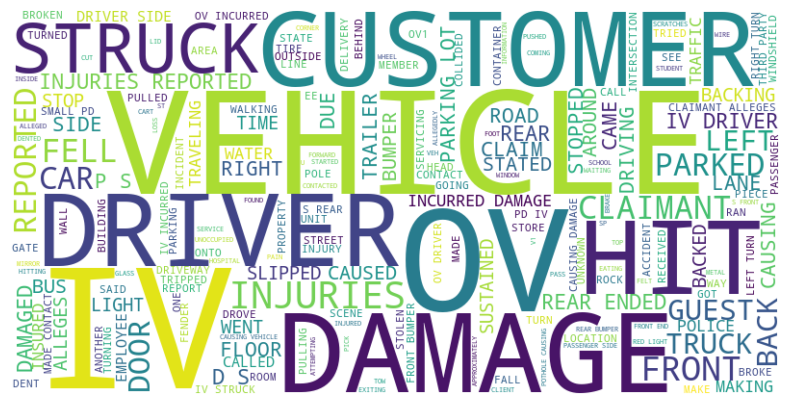

In [6]:
first_col = df.columns[0]
WCplot(first_col)

In [17]:
import pandas as pd
import numpy as np 
import re
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load the data
#df = pd.read_csv("data.csv")
df= pd.read_excel("Dataset_Public_mini.xlsx")

# Preprocess the text
df["Claim Description"] = df["Claim Description"].str.replace("[^\w\s]", "")
df["Claim Description"] = df["Claim Description"].str.replace("\d+", "")
df["Claim Description"] = df["Claim Description"].str.lower()
df["Claim Description"] = df["Claim Description"].str.strip()

df["Claim Description"] = df["Claim Description"].fillna("")
# Vectorize the text 
cv = CountVectorizer()
X = cv.fit_transform(df["Claim Description"])

# Train test split
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, df[["Coverage Code", "Accident Source"]], test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, df[["Coverage Code"]], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, df[["Accident Source"]], test_size=0.2, random_state=42)


# Build models
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions
mnb_preds = mnb.predict(X_test)
logreg_preds = logreg.predict(X_test) 
rf_preds = rf.predict(X_test)

# Calculate accuracy
mnb_acc = np.mean(np.array(y_test) == mnb_preds) 
logreg_acc = np.mean(np.array(y_test) == logreg_preds)
rf_acc = np.mean(np.array(y_test) == rf_preds)

# Print accuracy 
print("Naive Bayes Accuracy: ", mnb_acc)
print("Logistic Regression Accuracy: ", logreg_acc)
print("Random Forest Accuracy: ", rf_acc)

Naive Bayes Accuracy:  0.1018710528796305
Logistic Regression Accuracy:  0.07811763596945989
Random Forest Accuracy:  0.08045056084456594
